# Achieved FPS in Video Games
## Link to the dataset : [here](https://www.kaggle.com/datasets/kritikseth/achieved-frames-per-second-fps-in-video-games)

### Importing the libraries

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Increasing the display columns to 50
pd.set_option('display.max_columns', 50)

import seaborn as sns

### Initialise Dataset

In [84]:
df = pd.read_csv('fps_videogames.csv')

c:\Users\aiden\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,18,23,26,27,28,30,35,36,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [85]:
df.head()

,id,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,CpuMultiplierUnlocked,CpuProcessSize,CpuTDP,CpuNumberOfTransistors,CpuTurboClock,GpuName,GpuArchitecture,GpuBandwidth,GpuBaseClock,GpuBoostClock,'GpuBus,GpuNumberOfComputeUnits,GpuDieSize,GpuDirectX,GpuNumberOfExecutionUnits,GpuFP32Performance,GpuMemoryBus,GpuMemorySize,GpuMemoryType,GpuOpenCL,GpuOpenGL,GpuPixelRate,GpuProcessSize,GpuNumberOfROPs,GpuShaderModel,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,Dataset,FPS
0,1,Intel Core i7-920,4,8,133,256,1024,8,0.000263,2666,20.0,0,45,130,731,2933,AMD Radeon RX 480,GCN 4.0,256000,1120,1266,PCIe 3.0 x16,36,0.000232,12,?,5834000,256,8000,GDDR5,2.0,4.6,40510,14,32,6.4,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,70.0
1,2,Intel Core i7-920,4,8,133,256,1024,8,0.000263,2666,20.0,0,45,130,731,2933,AMD Radeon RX 480,GCN 4.0,256000,1120,1266,PCIe 3.0 x16,36,0.000232,12,?,5834000,256,8000,GDDR5,2.0,4.6,40510,14,32,6.4,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,230.0
2,3,Intel Core i5-4690,4,4,100,256,1024,6,0.000177,3400,34.0,0,22,84,1400,3800,NVIDIA GeForce GTX 1080 11Gbps,Pascal,352300,1607,1733,PCIe 3.0 x16,?,0.000314,12,?,8873000,256,8000,GDDR5X,1.2,4.6,110900,16,64,6.4,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,250.0
3,4,Intel Core i5-4690,4,4,100,256,1024,6,0.000177,3400,34.0,0,22,84,1400,3800,NVIDIA GeForce GTX 1080 11Gbps,Pascal,352300,1607,1733,PCIe 3.0 x16,?,0.000314,12,?,8873000,256,8000,GDDR5X,1.2,4.6,110900,16,64,6.4,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,300.0
4,5,Intel Core i5-4690,4,4,100,256,1024,6,0.000177,3400,34.0,0,22,84,1400,3800,AMD Radeon R7 260X,GCN 2.0,104000,1100,1100,PCIe 3.0 x16,14,0.00016,12,?,1971000,128,2000,GDDR5,2.0,4.6,17600,28,16,6.3,896,56,61600,2080,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,200.0


In [86]:
df.columns

Index(['id', 'CpuName', 'CpuNumberOfCores', 'CpuNumberOfThreads',
       'CpuBaseClock', 'CpuCacheL1', 'CpuCacheL2', 'CpuCacheL3', 'CpuDieSize',
       'CpuFrequency', 'CpuMultiplier', 'CpuMultiplierUnlocked',
       'CpuProcessSize', 'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock',
       'GpuName', 'GpuArchitecture', 'GpuBandwidth', 'GpuBaseClock',
       'GpuBoostClock', ''GpuBus', 'GpuNumberOfComputeUnits', 'GpuDieSize',
       'GpuDirectX', 'GpuNumberOfExecutionUnits', 'GpuFP32Performance',
       'GpuMemoryBus', 'GpuMemorySize', 'GpuMemoryType', 'GpuOpenCL',
       'GpuOpenGL', 'GpuPixelRate', 'GpuProcessSize', 'GpuNumberOfROPs',
       'GpuShaderModel', 'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs',
       'GpuTextureRate', 'GpuNumberOfTransistors', 'GpuVulkan', 'GameName',
       'GameResolution', 'GameSetting', 'Dataset', 'FPS'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425833 entries, 0 to 425832
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         425833 non-null  int64  
 1   CpuName                    425833 non-null  object 
 2   CpuNumberOfCores           425833 non-null  int64  
 3   CpuNumberOfThreads         425833 non-null  int64  
 4   CpuBaseClock               425833 non-null  int64  
 5   CpuCacheL1                 425833 non-null  int64  
 6   CpuCacheL2                 425833 non-null  int64  
 7   CpuCacheL3                 425833 non-null  object 
 8   CpuDieSize                 425833 non-null  object 
 9   CpuFrequency               425833 non-null  int64  
 10  CpuMultiplier              425833 non-null  float64
 11  CpuMultiplierUnlocked      425833 non-null  int64  
 12  CpuProcessSize             425833 non-null  int64  
 13  CpuTDP                     42

In [88]:
# Confirming that there are no null values
df.isnull().values.any()

False

Dataset has no null values

## Convert the categorical data into numerical data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425833 entries, 0 to 425832
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         425833 non-null  int64  
 1   CpuName                    425833 non-null  object 
 2   CpuNumberOfCores           425833 non-null  int64  
 3   CpuNumberOfThreads         425833 non-null  int64  
 4   CpuBaseClock               425833 non-null  int64  
 5   CpuCacheL1                 425833 non-null  int64  
 6   CpuCacheL2                 425833 non-null  int64  
 7   CpuCacheL3                 425833 non-null  object 
 8   CpuDieSize                 425833 non-null  object 
 9   CpuFrequency               425833 non-null  int64  
 10  CpuMultiplier              425833 non-null  float64
 11  CpuMultiplierUnlocked      425833 non-null  int64  
 12  CpuProcessSize             425833 non-null  int64  
 13  CpuTDP                     42

Several columns have categorical data, we need to convert them into numerical data.

In [90]:
# Listing the categorical columns
print("\nCategorical Columns: ")
print(df.select_dtypes(include=['object']).columns)

print("\nInfo on columns:")
df.select_dtypes(include=['object']).info()


Categorical Columns: 
Index(['CpuName', 'CpuCacheL3', 'CpuDieSize', 'CpuNumberOfTransistors',
       'GpuName', 'GpuArchitecture', 'GpuBandwidth', ''GpuBus',
       'GpuNumberOfComputeUnits', 'GpuDieSize', 'GpuDirectX',
       'GpuNumberOfExecutionUnits', 'GpuFP32Performance', 'GpuMemoryBus',
       'GpuMemorySize', 'GpuMemoryType', 'GpuOpenCL', 'GpuShaderModel',
       'GpuNumberOfShadingUnits', 'GpuNumberOfTransistors', 'GpuVulkan',
       'GameName', 'GameSetting', 'Dataset'],
      dtype='object')

Info on columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425833 entries, 0 to 425832
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   CpuName                    425833 non-null  object
 1   CpuCacheL3                 425833 non-null  object
 2   CpuDieSize                 425833 non-null  object
 3   CpuNumberOfTransistors     425833 non-null  object
 4   GpuName               

In [91]:
# Creating a dictionary of CPU names and giving each a unique number
uniqueCPUs = df['CpuName'].unique()
cpuDict = {}

for i in range(len(uniqueCPUs)):
    cpuDict.update({uniqueCPUs[i]: i})

# Updating the CpuName column with the unique numbers
df['CpuName'] = df['CpuName'].map(cpuDict)

In [92]:
cpuDict

{'Intel Core i7-920': 0,
 'Intel Core i5-4690': 1,
 'Intel Core i5-4570': 2,
 'Intel Core i5-6600': 3,
 'Intel Core i5-4590': 4,
 'Intel Core i5-2400': 5,
 'Intel Core i5-4440': 6,
 'Intel Core i5-3470': 7,
 'Intel Core i5-8600K': 8,
 'Intel Core i5-8400': 9,
 'Intel Core i5-2500K': 10,
 'Intel Core i5-7500': 11,
 'Intel Core i5-4670K': 12,
 'Intel Core i5-7600K': 13,
 'Intel Core i5-3570K': 14,
 'Intel Core i5-6500': 15,
 'Intel Core i5-7400': 16,
 'Intel Core i5-6400': 17,
 'Intel Core i5-4690K': 18,
 'Intel Core i5-6600K': 19,
 'Intel Core i7-9700K': 20,
 'Intel Core i7-8750H': 21,
 'Intel Core i7-8700': 22,
 'Intel Core i7-2600K': 23,
 'Intel Core i7-3770K': 24,
 'Intel Core i7-4770': 25,
 'Intel Core i7-2600': 26,
 'Intel Core i7-7700': 27,
 'Intel Core i7-4770K': 28,
 'Intel Core i7-6700': 29,
 'Intel Core i7-3770': 30,
 'Intel Core i7-8700K': 31,
 'Intel Core i7-4790': 32,
 'Intel Core i7-6700K': 33,
 'Intel Core i7-4790K': 34,
 'Intel Core i7-7700K': 35,
 'AMD Ryzen 5 3400G': 3

In [93]:
# Creating a dictionary of GPU names and giving each a unique number
uniqueGPUs = df['GpuName'].unique()
gpuDict = {}

for i in range(len(uniqueGPUs)):
    gpuDict.update({uniqueGPUs[i]: i})

# Updating the GpuName column with the unique numbers
df['GpuName'] = df['GpuName'].map(gpuDict)

In [94]:
# Creating a dictionary for GameSettings and giving each a unique number
uniqueGameSettings = df['GameSetting'].unique()
gameSettingsDict = {}

for i in range(len(uniqueGameSettings)):
    gameSettingsDict.update({uniqueGameSettings[i]: i})

# Updating the GameSettings column with the unique numbers
df['GameSetting'] = df['GameSetting'].map(gameSettingsDict)

In [95]:
print(gameSettingsDict)

{'low': 0, 'med': 1, 'high': 2, 'max': 3}


In [96]:
df

,id,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,CpuMultiplierUnlocked,CpuProcessSize,CpuTDP,CpuNumberOfTransistors,CpuTurboClock,GpuName,GpuArchitecture,GpuBandwidth,GpuBaseClock,GpuBoostClock,'GpuBus,GpuNumberOfComputeUnits,GpuDieSize,GpuDirectX,GpuNumberOfExecutionUnits,GpuFP32Performance,GpuMemoryBus,GpuMemorySize,GpuMemoryType,GpuOpenCL,GpuOpenGL,GpuPixelRate,GpuProcessSize,GpuNumberOfROPs,GpuShaderModel,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,Dataset,FPS
0,1,0,4,8,133,256,1024,8,0.000263,2666,20.0,0,45,130,731,2933,0,GCN 4.0,256000,1120,1266,PCIe 3.0 x16,36,0.000232,12,?,5834000,256,8000,GDDR5,2.0,4.6,40510,14,32,6.4,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,0,userbenchmark,70.0
1,2,0,4,8,133,256,1024,8,0.000263,2666,20.0,0,45,130,731,2933,0,GCN 4.0,256000,1120,1266,PCIe 3.0 x16,36,0.000232,12,?,5834000,256,8000,GDDR5,2.0,4.6,40510,14,32,6.4,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,0,userbenchmark,230.0
2,3,1,4,4,100,256,1024,6,0.000177,3400,34.0,0,22,84,1400,3800,1,Pascal,352300,1607,1733,PCIe 3.0 x16,?,0.000314,12,?,8873000,256,8000,GDDR5X,1.2,4.6,110900,16,64,6.4,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,0,userbenchmark,250.0
3,4,1,4,4,100,256,1024,6,0.000177,3400,34.0,0,22,84,1400,3800,1,Pascal,352300,1607,1733,PCIe 3.0 x16,?,0.000314,12,?,8873000,256,8000,GDDR5X,1.2,4.6,110900,16,64,6.4,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,0,userbenchmark,300.0
4,5,1,4,4,100,256,1024,6,0.000177,3400,34.0,0,22,84,1400,3800,2,GCN 2.0,104000,1100,1100,PCIe 3.0 x16,14,0.00016,12,?,1971000,128,2000,GDDR5,2.0,4.6,17600,28,16,6.3,896,56,61600,2080,1.2.131,counterStrikeGlobalOffensive,1080,0,userbenchmark,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425828,425829,57,6,12,100,576,3072,32,0.000074,3600,36.0,1,7,65,3800,4200,53,GCN 4.0,224000,1168,1244,PCIe 3.0 x16,32,0.000232,12,?,5095000,256,4000,GDDR5,2.0,4.6,39810,14,32,6.4,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,3,fpsbenchmark,51.5
425829,425830,63,6,12,100,576,3072,16,0.000192,3600,36.0,1,12,95,4800,4250,53,GCN 4.0,224000,1168,1244,PCIe 3.0 x16,32,0.000232,12,?,5095000,256,4000,GDDR5,2.0,4.6,39810,14,32,6.4,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,3,fpsbenchmark,49.9
425830,425831,65,6,12,100,576,3072,16,0.000192,3600,36.0,1,14,95,4800,4000,53,GCN 4.0,224000,1168,1244,PCIe 3.0 x16,32,0.000232,12,?,5095000,256,4000,GDDR5,2.0,4.6,39810,14,32,6.4,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,3,fpsbenchmark,46.9
425831,425832,69,6,12,100,576,3072,16,0.000192,3400,34.0,1,12,65,4800,3900,53,GCN 4.0,224000,1168,1244,PCIe 3.0 x16,32,0.000232,12,?,5095000,256,4000,GDDR5,2.0,4.6,39810,14,32,6.4,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,3,fpsbenchmark,46.4


In [97]:
df['GpuMemorySize'].unique()

array(['8000', '2000', '3000', '4000', '6000', '1024', '1536', '512',
       '1792', '?', '11000', '1280', '16000', '12000', '256', '320',
       '128', '5000', '768', '24000', '896', '2500', '384', 8000, 6000,
       4000, 5000, 3000, 16000, 11000, 12000], dtype=object)

In [98]:
# Count how many entries in the entire dataframe are a question mark
df[df == '?'].count()

id                                0
CpuName                           0
CpuNumberOfCores                  0
CpuNumberOfThreads                0
CpuBaseClock                      0
CpuCacheL1                        0
CpuCacheL2                        0
CpuCacheL3                     5055
CpuDieSize                   202534
CpuFrequency                      0
CpuMultiplier                     0
CpuMultiplierUnlocked             0
CpuProcessSize                    0
CpuTDP                            0
CpuNumberOfTransistors       226039
CpuTurboClock                     0
GpuName                           0
GpuArchitecture                   0
GpuBandwidth                  15441
GpuBaseClock                      0
GpuBoostClock                     0
'GpuBus                           0
GpuNumberOfComputeUnits      357107
GpuDieSize                    11196
GpuDirectX                        0
GpuNumberOfExecutionUnits    412935
GpuFP32Performance               56
GpuMemoryBus                

In [99]:
df = df.drop(columns='CpuDieSize')
df = df.drop(columns='CpuNumberOfTransistors')
df = df.drop(columns='GpuNumberOfComputeUnits')
df = df.drop(columns='GpuNumberOfExecutionUnits')

df = df[df.GpuMemorySize != '?']

# Drop the rows that contain a question mark in CPUCacheL3
# df = df[df.CpuCacheL3 != '?']
# df = df[df.GpuBandwidth != '?']
# df = df[df.GpuMemorySize != '?']
# df = df[df.GpuDieSize != '?']
# df = df[df.GpuFP32Performance != '?']
# df = df[df.GpuOpenCL != '?']
# df = df[df.GpuVulkan != '?']

In [100]:
# Count how many entries in the entire dataframe are a question mark
df[df == '?'].count()

id                             0
CpuName                        0
CpuNumberOfCores               0
CpuNumberOfThreads             0
CpuBaseClock                   0
CpuCacheL1                     0
CpuCacheL2                     0
CpuCacheL3                  4889
CpuFrequency                   0
CpuMultiplier                  0
CpuMultiplierUnlocked          0
CpuProcessSize                 0
CpuTDP                         0
CpuTurboClock                  0
GpuName                        0
GpuArchitecture                0
GpuBandwidth                   0
GpuBaseClock                   0
GpuBoostClock                  0
'GpuBus                        0
GpuDieSize                  1051
GpuDirectX                     0
GpuFP32Performance            30
GpuMemoryBus                   0
GpuMemorySize                  0
GpuMemoryType                  0
GpuOpenCL                    117
GpuOpenGL                      0
GpuPixelRate                   0
GpuProcessSize                 0
GpuNumberO

In [101]:
# Change GpuMemorySize to an integer
df['GpuMemorySize'] = df['GpuMemorySize'].astype(int)

In [102]:
df['FPS'].value_counts()

120.0    39939
100.0    35716
300.0    31168
140.0    30910
80.0     28223
         ...  
274.6        1
294.0        1
296.6        1
260.3        1
38.0         1
Name: FPS, Length: 2740, dtype: int64

In [103]:
# Converting the FPS ranges to integers. Any FPS lower than 30 will be a -1 and any FPS between 30 and 60 will be a 0 and any FPS above 60 will be a 1
df['FPS'] = df['FPS'].map(lambda x: 0 if x < 30 else 1 if x <= 60 else 2)

In [104]:
df['FPS'].value_counts()

2    353409
1     51708
0      5275
Name: FPS, dtype: int64

# Examine Linearity and Normality

In [105]:
# Checking data frame for outliers
df.describe()

,id,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuFrequency,CpuMultiplier,CpuMultiplierUnlocked,CpuProcessSize,CpuTDP,CpuTurboClock,GpuName,GpuBaseClock,GpuBoostClock,GpuMemorySize,GpuOpenGL,GpuPixelRate,GpuProcessSize,GpuNumberOfROPs,GpuNumberOfTMUs,GpuTextureRate,GameResolution,GameSetting,FPS
count,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000,410392.000000
mean,214757.503745,47.436685,4.971559,8.021765,108.876248,353.909745,2034.709449,3530.815472,33.719674,0.589994,17.355558,83.284360,4037.772949,32.113355,1323.881684,1459.020939,6034.502320,4.588505,75932.992359,18.613601,50.168444,114.407727,171997.566541,1076.242909,1.978148,1.848296
std,123030.976207,40.869830,1.677916,3.839016,28.551404,166.637725,1820.310328,401.235247,6.291655,0.491835,7.102324,19.602661,441.997686,50.630112,249.350942,292.625428,2707.272438,0.113077,36840.322912,7.109449,20.139602,53.834146,91072.775106,153.112888,1.204630,0.392934
min,1.000000,0.000000,1.000000,1.000000,100.000000,64.000000,512.000000,1600.000000,8.000000,0.000000,7.000000,15.000000,1600.000000,0.000000,350.000000,350.000000,128.000000,2.100000,700.000000,7.000000,2.000000,4.000000,1400.000000,720.000000,0.000000,0.000000
25%,108600.750000,20.000000,4.000000,4.000000,100.000000,256.000000,1024.000000,3300.000000,32.000000,0.000000,14.000000,65.000000,3800.000000,12.000000,1120.000000,1216.000000,4000.000000,4.600000,40510.000000,14.000000,32.000000,80.000000,122500.000000,1080.000000,1.000000,2.000000
50%,216225.500000,34.000000,4.000000,8.000000,100.000000,256.000000,1024.000000,3500.000000,35.000000,1.000000,14.000000,91.000000,4000.000000,15.000000,1470.000000,1582.000000,6000.000000,4.600000,82030.000000,16.000000,48.000000,120.000000,157100.000000,1080.000000,3.000000,2.000000
75%,321894.250000,65.000000,6.000000,12.000000,100.000000,384.000000,3072.000000,3800.000000,37.000000,1.000000,22.000000,95.000000,4350.000000,46.000000,1506.000000,1709.000000,8000.000000,4.600000,107700.000000,16.000000,64.000000,152.000000,222700.000000,1080.000000,3.000000,2.000000
max,425833.000000,357.000000,32.000000,64.000000,800.000000,3072.000000,18432.000000,4700.000000,43.000000,1.000000,90.000000,250.000000,5000.000000,445.000000,1680.000000,1980.000000,24000.000000,4.600000,169900.000000,110.000000,96.000000,320.000000,509800.000000,1440.000000,3.000000,2.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'CpuName'}>,
        <AxesSubplot:title={'center':'CpuNumberOfCores'}>,
        <AxesSubplot:title={'center':'CpuNumberOfThreads'}>,
        <AxesSubplot:title={'center':'CpuBaseClock'}>],
       [<AxesSubplot:title={'center':'CpuCacheL1'}>,
        <AxesSubplot:title={'center':'CpuCacheL2'}>,
        <AxesSubplot:title={'center':'CpuFrequency'}>,
        <AxesSubplot:title={'center':'CpuMultiplier'}>,
        <AxesSubplot:title={'center':'CpuMultiplierUnlocked'}>],
       [<AxesSubplot:title={'center':'CpuProcessSize'}>,
        <AxesSubplot:title={'center':'CpuTDP'}>,
        <AxesSubplot:title={'center':'CpuTurboClock'}>,
        <AxesSubplot:title={'center':'GpuName'}>,
        <AxesSubplot:title={'center':'GpuBaseClock'}>],
       [<AxesSubplot:title={'center':'GpuBoostClock'}>,
        <AxesSubplot:title={'center':'GpuMemorySize'}>,
        <AxesSubplot:title={'center':'GpuOpenGL'}>,
        <AxesSu

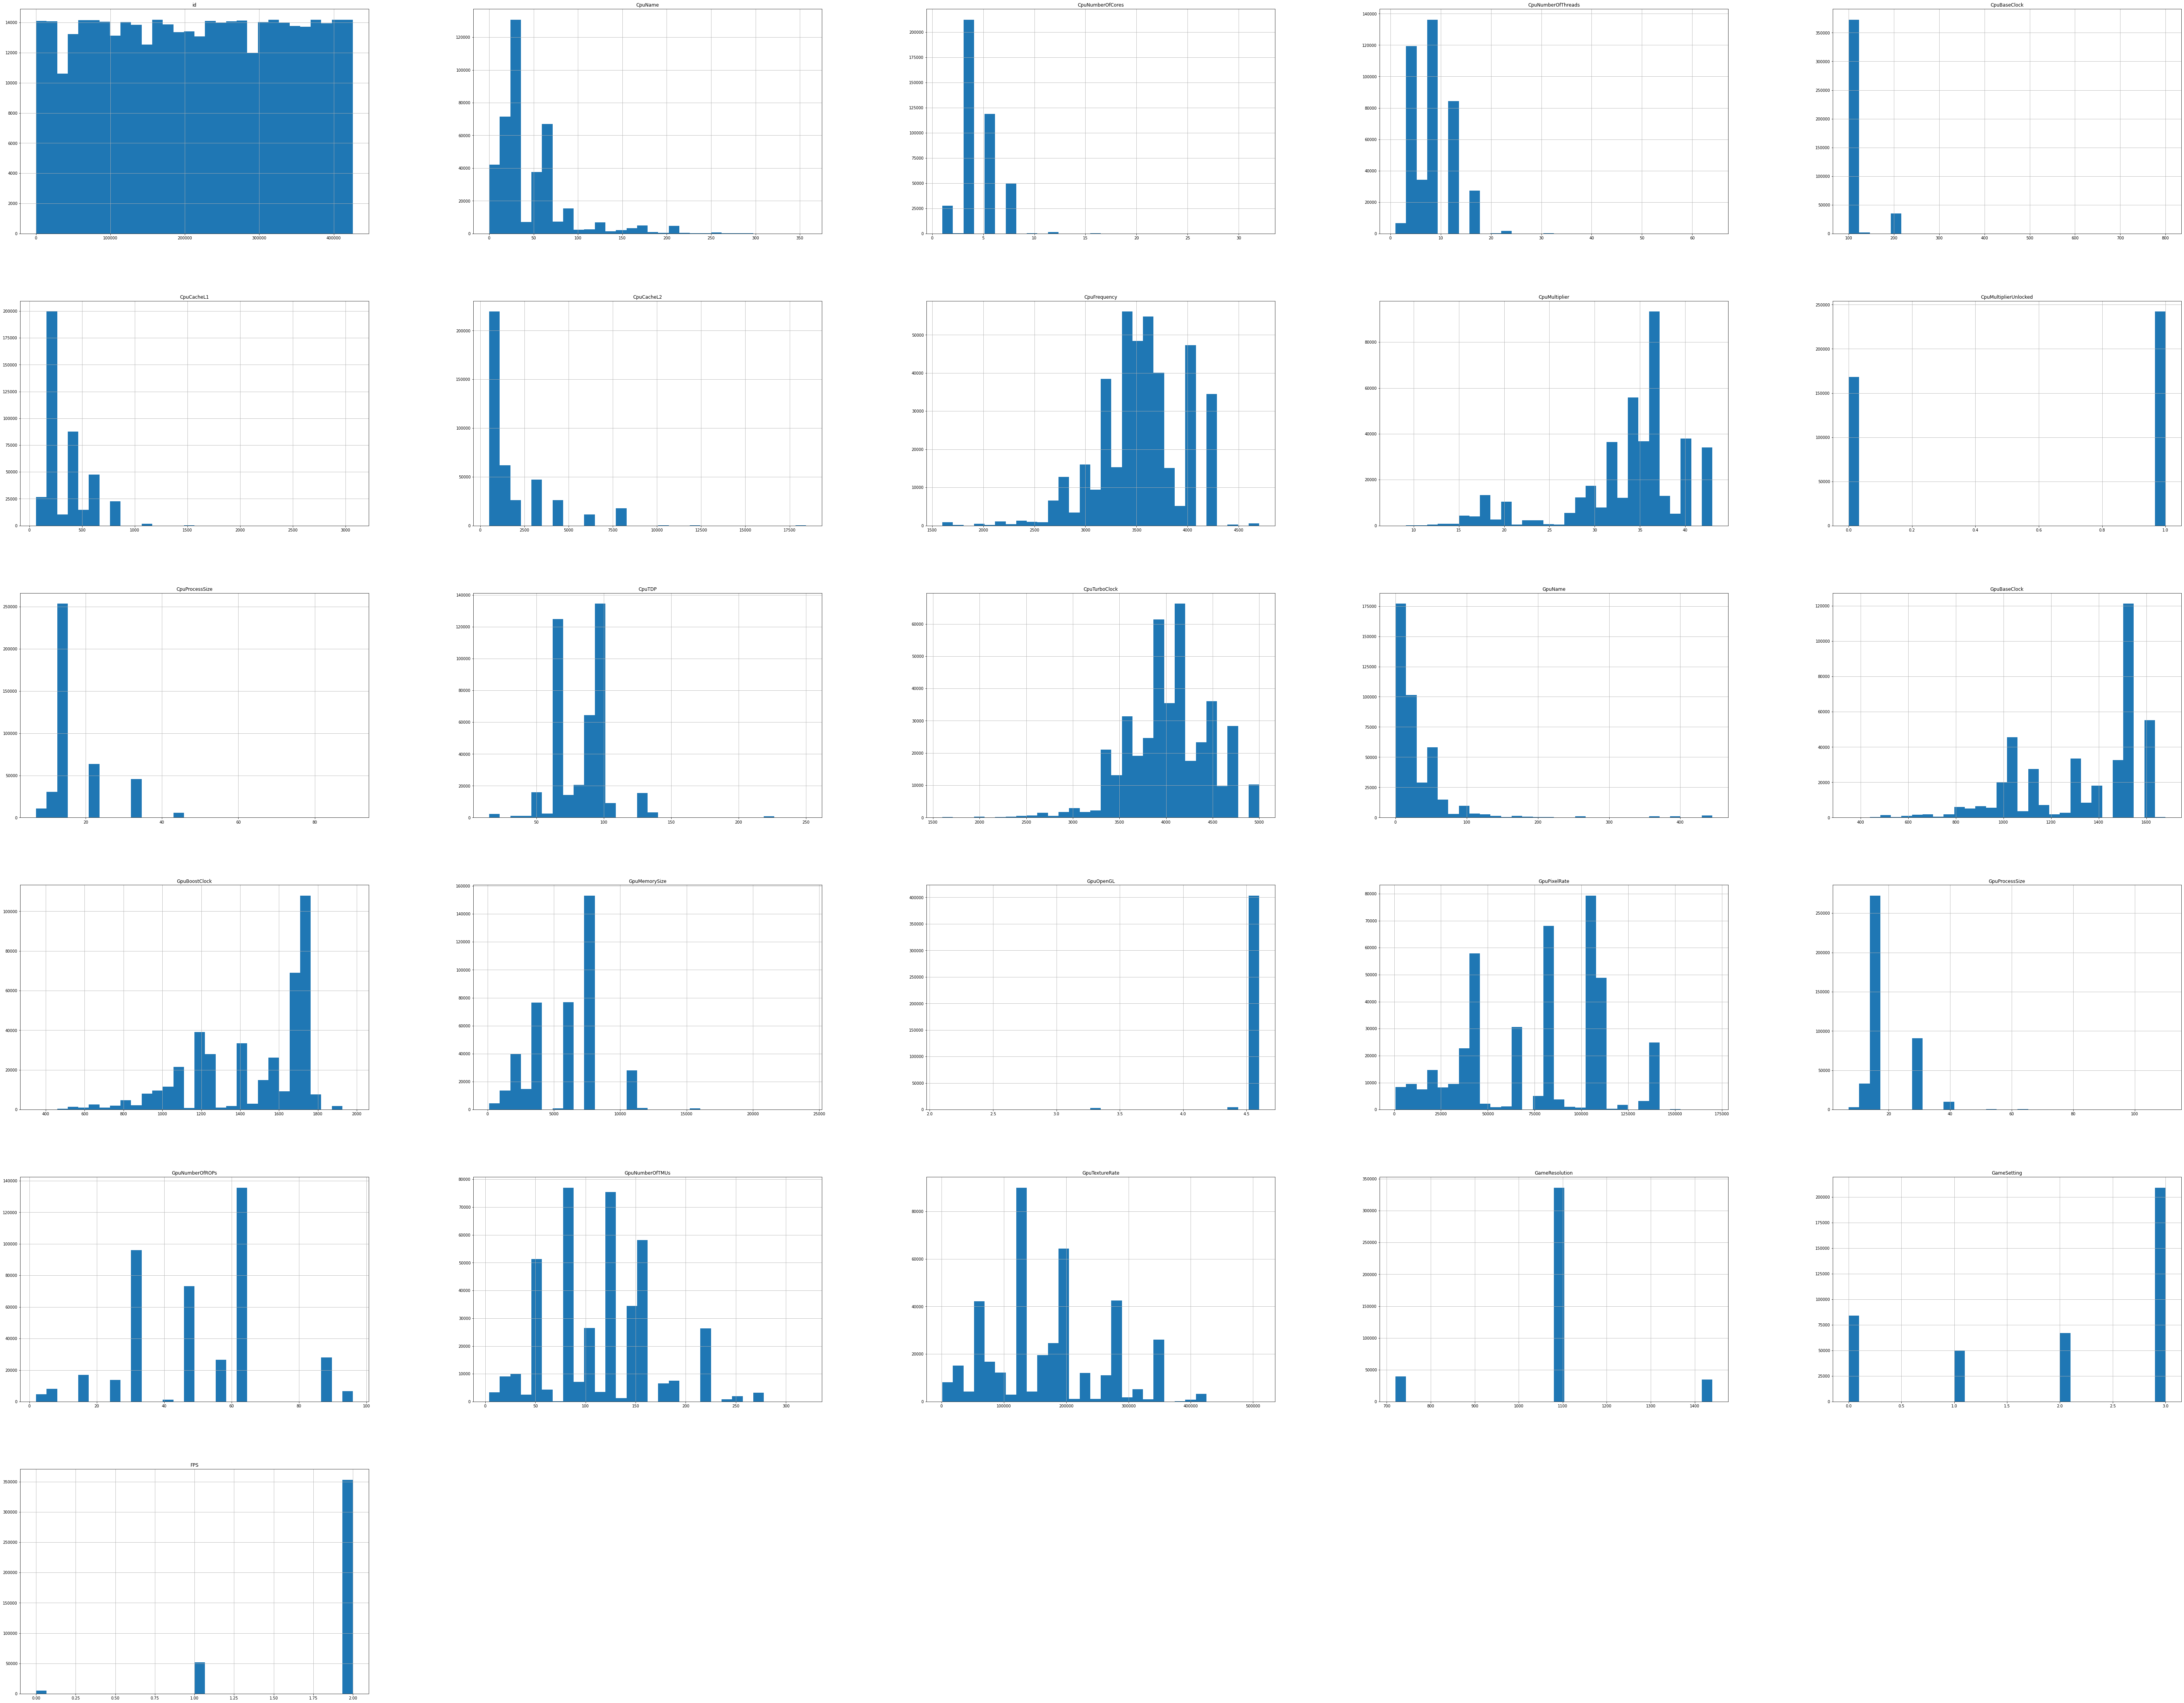

In [106]:
df.hist(bins=30, figsize=(100, 80))

['counterStrikeGlobalOffensive' 'grandTheftAuto5' 'worldOfTanks' 'rust'
 'leagueOfLegends' 'arkSurvivalEvolved' 'apexLegends' 'minecraft'
 'playerUnknownsBattlegrounds' 'battlefield1' 'fortnite' 'rocketLeague'
 'callOfDutyBlackOps4' 'dota2' 'overwatch' 'battlefield4' 'callOfDutyWW2'
 'pathOfExile' 'destiny2' 'radicalHeights' 'seaOfThieves' 'frostpunk'
 'totalWar3Kingdoms' 'warframe' 'airMechStrike' 'battletech' 'farCry5'
 'starcraft2' 'rainbowSixSiege' 'aWayOut']


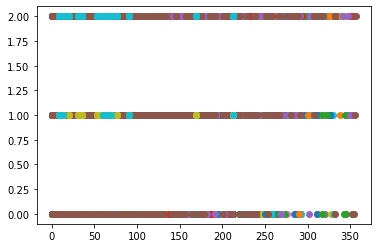

In [107]:
#getting all games tested and putting them in a list
print(df["GameName"].unique())
gameNames = df['GameName'].unique()

#loops through each game and gets fps for each game
#did this to try to find outliers
for game in gameNames:
    df2 = df[df.GameName == game]
    x = df2['CpuName']
    y = df2['FPS']
    plt.scatter(x, y)

In [108]:
#we said any fps value over 400 is an outlier
#made dataframe only containing the outliers and checked how much of a percentage they took up in the entire dataframe
df3 = df[df['FPS'] > 399]
print(len(df3)/ len(df) * 100)

0.0


In [109]:
#since outliers were only 1.6 percent of the dataframe so we thought it was safe to remove them
df = df[df['FPS'] < 400]
df.shape

(410392, 42)

# Check the correlation between the features

<AxesSubplot:>

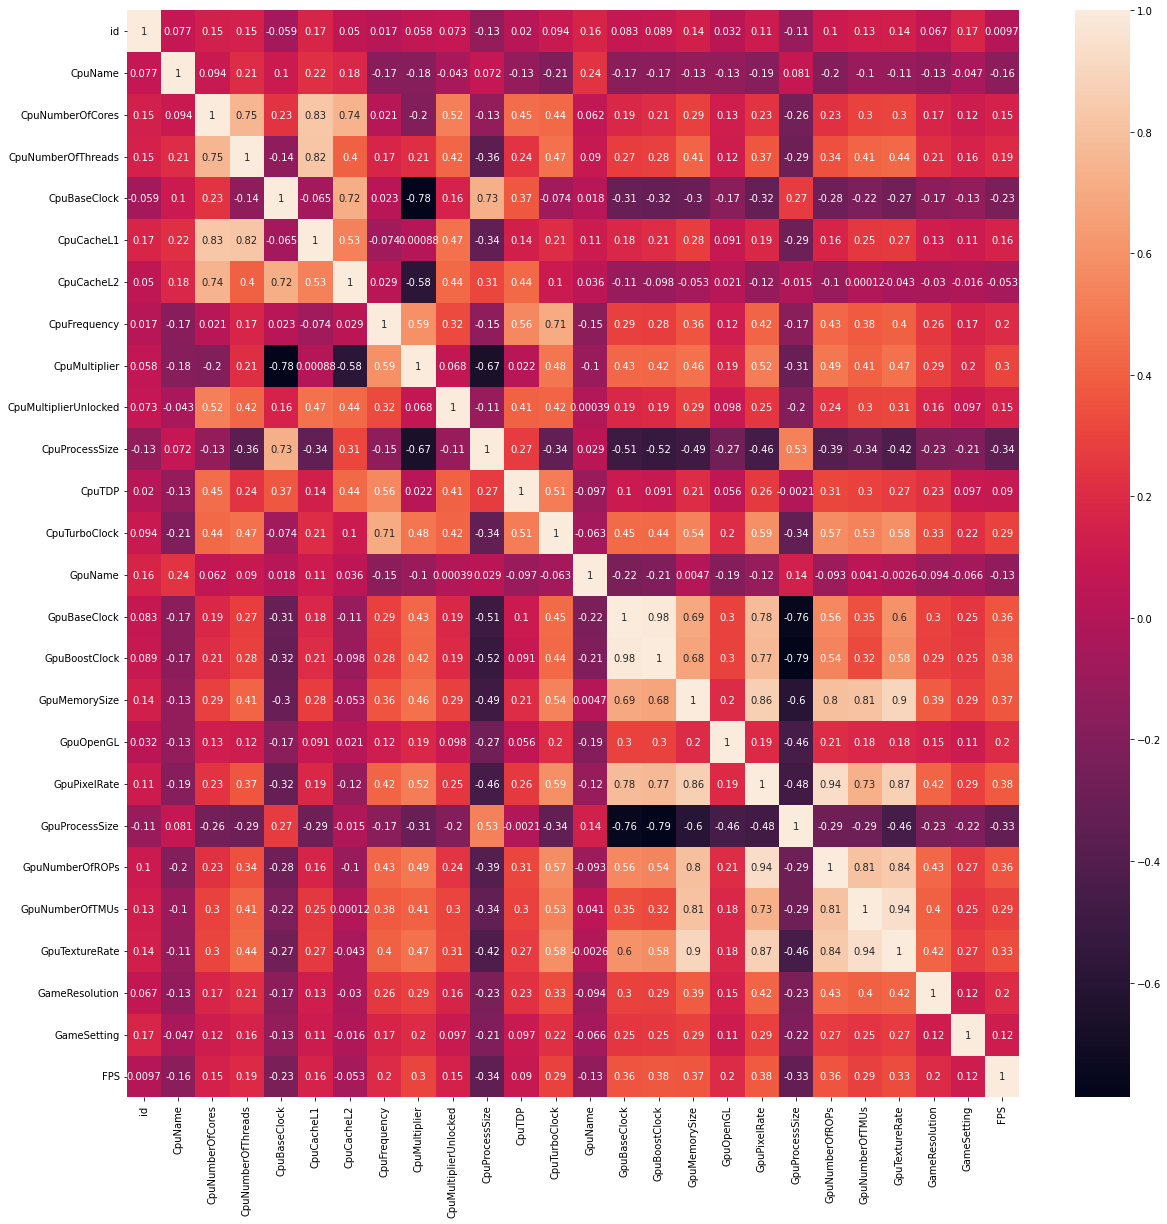

In [110]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Logistic Regression

In [123]:
y = df['FPS']

# x = df[['CpuName', 'GpuName']] # Accuracy is 0.860256
# x = df[['CpuName', 'GpuName', 'GameSetting']] # Accuracy is 0.860817
x = df[['CpuName', 'GpuName', 'GpuMemorySize']] # Accruacy is 0.8715993
# x = df[['CpuName', 'GpuName', 'GpuMemorySize', 'GameSetting']] # Accuracy is 0.87097796 with a warning?

# x = df[['CpuName', 'GpuName', 'GpuMemorySize', 'GameSetting', 'GameResolution']] # Accuracy is 

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [125]:
# Printing the accuracy of the model
print('R^2 Value is: ', regressor.score(x_test, y_test))

R^2 Value is:  0.8715993128571254


# Decision Tree

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

# Round the predictions to the nearest integer
y_pred = (np.rint(y_pred)).astype(int)

In [115]:
print('R-squared: {0:.4f}'.format(r2_score(y_test, y_pred)))

traintTest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
traintTest

R-squared: 0.0181


,Actual,Predicted
107976,2,2
275022,2,2
9660,2,2
231436,2,2
298781,2,2
...,...,...
214,2,1
333244,2,2
78140,2,2
358745,2,2


In [116]:
# Seeing how many predictions were correct
traintTest['Correct'] = traintTest['Actual'] == traintTest['Predicted']
traintTest['Correct'].value_counts()

True     71565
False    10514
Name: Correct, dtype: int64

In [117]:
df.shape

(410392, 42)